# IELE_4014 - Reto 7
**Felipe Velásquez Montoya - 201632422**

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import NuSVC
import math
import matplotlib.pyplot as plt

In [3]:
data_matrix = np.loadtxt(open("./msd_genre_dataset/fixed_ds.csv", "r"), delimiter=",", skiprows=0)



print("Filas de la matriz: " + str(len(data_matrix)))
print("Columnas de la matriz: " + str(len(data_matrix[0])))


#Los datos del set de datos están agrupados por género. Es decir, primero están todas las filas que corresponden
#a 1 y después todas las que corresponden a -1. Se hace un shuffle para que, más tarde,
#no se creen unos modelos que predigan únicamente una clase.
np.random.shuffle(data_matrix)


y = data_matrix[:,len(data_matrix[0])-1]
X = np.delete(data_matrix, len(data_matrix[0])-1,1)

y = y.astype(int)


print("X shape" + str(X.shape))
print("y shape" + str(y.shape))
print(X)
print(y)

Filas de la matriz: 8330
Columnas de la matriz: 31
X shape(8330, 30)
y shape(8330,)
[[ -4.174      127.973        4.         ... 349.58325182 355.31067426
  198.9333998 ]
 [-12.862       85.894        4.         ... 274.3172172  224.64710844
  236.9954727 ]
 [ -8.401      120.004        4.         ... 219.26762648 180.16479996
  522.74218959]
 ...
 [-13.592       82.406        5.         ... 338.17229285 256.55437796
  573.50193719]
 [-10.372      118.775        4.         ... 370.62651829 402.26244942
  382.20580041]
 [ -3.487      157.053        4.         ... 507.66199686 638.06818386
  459.10670922]]
[0 1 1 ... 1 1 0]


Se decidió dedicar el 20% de los datos al conjunto de prueba y el 80% al conjunto de entrenamiento, en este segundo conjunto, se decidió implementar una técnica de validación cruzada para la selección de los modelos. Para el conjunto de validación a utilizarse en esta heurística, decidió usarse el 10% de los datos de entrenamiento. La elección de los conjuntos se hace al azar utilizando el método train_test_split de sklearn. Aunque no es posible garantizar que los conjuntos tengan la misma distribución de clases, dada la naturaleza aleatoria del método train_test_split, se espera que estas sean semejantes.


In [4]:
percentage_test = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = percentage_test) 

print("Training set size: %s" % len(X_train))
print("Test set size: %s" % len(X_test))

Training set size: 6664
Test set size: 1666


Escoger el Kernel.

In [16]:
percentage_validation = 0.1

kf = KFold(n_splits=math.floor(1/percentage_validation))

kernels =  ["rbf", "linear", "sigmoid", "poly"] 
scores = []
best_score = 1
best_kernel = ""

for kernel in kernels:

    i = 0
    score = 0
    print("Kernel: %s" %kernel)
    #Validación cruzada del SVM
    for train_index, test_index in kf.split(X_train):
        X_train_cv, X_validate = X_train[train_index], X_train[test_index]
        y_train_cv, y_validate = y_train[train_index], y_train[test_index]
        
        if kernel == "poly": 
            nusvc = NuSVC(kernel = kernel, gamma = "auto", max_iter = 1000000)
        else:
            nusvc = NuSVC(kernel = kernel, gamma = "auto")
            
        nusvc.fit(X_train_cv,y_train_cv)
    
        fold_score = nusvc.score(X_validate, y_validate)
        score += fold_score
        i+=1
        print("    FOLD %s error: %s" % (i, 1 - fold_score))
    
    score = 1- (score/i)
    scores.append(score)
    
    if score < best_score:
        best_score = score
        best_kernel = kernel
    
    print("Average error probability for NuSVC with %s kernel: %s" % (kernel, score))

print("Lowest error probability: %s for model with %s kernel" % (best_score, best_kernel))

Kernel: rbf
    FOLD 1 error: 0.4587706146926537
    FOLD 2 error: 0.4707646176911544
    FOLD 3 error: 0.4497751124437781
    FOLD 4 error: 0.46026986506746626
    FOLD 5 error: 0.48798798798798804
    FOLD 6 error: 0.503003003003003
    FOLD 7 error: 0.48948948948948945
    FOLD 8 error: 0.5015015015015015
    FOLD 9 error: 0.48198198198198194
    FOLD 10 error: 0.5105105105105106
Average error probability for NuSVC with rbf kernel: 0.48140546843695275
Kernel: linear
    FOLD 1 error: 0.18140929535232386
    FOLD 2 error: 0.19040479760119944
    FOLD 3 error: 0.1784107946026986
    FOLD 4 error: 0.17991004497751129
    FOLD 5 error: 0.19819819819819817
    FOLD 6 error: 0.18918918918918914
    FOLD 7 error: 0.22672672672672678
    FOLD 8 error: 0.1501501501501501
    FOLD 9 error: 0.19819819819819817
    FOLD 10 error: 0.1711711711711712
Average error probability for NuSVC with linear kernel: 0.18637685661673675
Kernel: sigmoid
    FOLD 1 error: 0.4587706146926537
    FOLD 2 error: 0

/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


    FOLD 1 error: 0.21739130434782605


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


    FOLD 2 error: 0.22488755622188905


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


    FOLD 3 error: 0.1859070464767616


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


    FOLD 4 error: 0.19490254872563717


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


    FOLD 5 error: 0.22372372372372373


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


    FOLD 6 error: 0.20870870870870872


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


    FOLD 7 error: 0.2702702702702703


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


    FOLD 8 error: 0.19069069069069067


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


    FOLD 9 error: 0.20570570570570568
    FOLD 10 error: 0.21171171171171166
Average error probability for NuSVC with poly kernel: 0.21338992665829237
Lowest error probability: 0.18637685661673675 for model with linear kernel


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Graficar errores

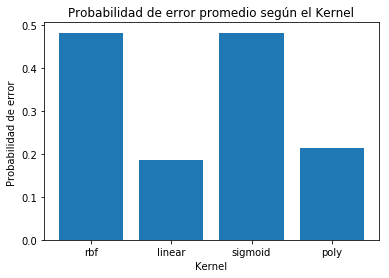

In [19]:
plt.bar(kernels, scores)
plt.xlabel('Kernel')
plt.ylabel('Probabilidad de error ')
plt.title('Probabilidad de error promedio según el Kernel')
plt.show()

Linear y Poly muy parecidos, sin embargo Poly está alcanzando su límite de iteraciones, intentar StandardScaler, MinMaxScaler y RobustScaler con cada uno de estos métodos, ver cómo cambia el desempeño y si así Poly acaba antes de max_iters

Primero con MinMaxScaler

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X)
X_train_scaled = scaler.transform(X_train)

percentage_validation = 0.1
kf = KFold(n_splits=math.floor(1/percentage_validation))

kernels =  ["linear", "poly"] 
scores = []
best_score = 1
best_kernel = ""

for kernel in kernels:

    i = 0
    score = 0
    print("Kernel: %s" %kernel)
    #Validación cruzada del SVM
    for train_index, test_index in kf.split(X_train_scaled):
        X_train_cv, X_validate = X_train_scaled[train_index], X_train_scaled[test_index]
        y_train_cv, y_validate = y_train[train_index], y_train[test_index]
        
        if kernel == "poly": 
            nusvc = NuSVC(kernel = kernel, gamma = "auto", max_iter = 1000000)
        else:
            nusvc = NuSVC(kernel = kernel, gamma = "auto")
            
        nusvc.fit(X_train_cv,y_train_cv)
    
        fold_score = nusvc.score(X_validate, y_validate)
        score += fold_score
        i+=1
        print("    FOLD %s error: %s" % (i, 1 - fold_score))
    
    score = 1- (score/i)
    scores.append(score)
    
    if score < best_score:
        best_score = score
        best_kernel = kernel
    
    print("Average error probability for NuSVC with %s kernel: %s" % (kernel, score))

print("Lowest error probability: %s for model with %s kernel" % (best_score, best_kernel))

Kernel: linear
    FOLD 1 error: 0.15892053973013498
    FOLD 2 error: 0.16941529235382313
    FOLD 3 error: 0.16791604197901044
    FOLD 4 error: 0.17691154422788602
    FOLD 5 error: 0.18018018018018023
    FOLD 6 error: 0.17567567567567566
    FOLD 7 error: 0.1921921921921922
    FOLD 8 error: 0.1636636636636637
    FOLD 9 error: 0.20420420420420415
    FOLD 10 error: 0.16216216216216217
Average error probability for NuSVC with linear kernel: 0.17512414963689316
Kernel: poly
    FOLD 1 error: 0.1649175412293853
    FOLD 2 error: 0.17541229385307344
    FOLD 3 error: 0.16941529235382313
    FOLD 4 error: 0.18890554722638686
    FOLD 5 error: 0.17267267267267272
    FOLD 6 error: 0.17417417417417413
    FOLD 7 error: 0.1921921921921922
    FOLD 8 error: 0.16966966966966968
    FOLD 9 error: 0.19819819819819817
    FOLD 10 error: 0.1711711711711712
Average error probability for NuSVC with poly kernel: 0.17767287527407483
Lowest error probability: 0.17512414963689316 for model with line

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_train_scaled = scaler.transform(X_train)

percentage_validation = 0.1
kf = KFold(n_splits=math.floor(1/percentage_validation))

kernels =  ["linear", "poly"] 
scores = []
best_score = 1
best_kernel = ""

for kernel in kernels:

    i = 0
    score = 0
    print("Kernel: %s" %kernel)
    #Validación cruzada del SVM
    for train_index, test_index in kf.split(X_train_scaled):
        X_train_cv, X_validate = X_train_scaled[train_index], X_train_scaled[test_index]
        y_train_cv, y_validate = y_train[train_index], y_train[test_index]
        
        if kernel == "poly": 
            nusvc = NuSVC(kernel = kernel, gamma = "auto", max_iter = 1000000)
        else:
            nusvc = NuSVC(kernel = kernel, gamma = "auto")
            
        nusvc.fit(X_train_cv,y_train_cv)
    
        fold_score = nusvc.score(X_validate, y_validate)
        score += fold_score
        i+=1
        print("    FOLD %s error: %s" % (i, 1 - fold_score))
    
    score = 1- (score/i)
    scores.append(score)
    
    if score < best_score:
        best_score = score
        best_kernel = kernel
    
    print("Average error probability for NuSVC with %s kernel: %s" % (kernel, score))

print("Lowest error probability: %s for model with %s kernel" % (best_score, best_kernel))

Kernel: linear
    FOLD 1 error: 0.16191904047976013
    FOLD 2 error: 0.16791604197901044
    FOLD 3 error: 0.16641679160419787
    FOLD 4 error: 0.16791604197901044
    FOLD 5 error: 0.16816816816816815
    FOLD 6 error: 0.17417417417417413
    FOLD 7 error: 0.19669669669669665
    FOLD 8 error: 0.15915915915915912
    FOLD 9 error: 0.19669669669669665
    FOLD 10 error: 0.16516516516516522
Average error probability for NuSVC with linear kernel: 0.17242279761020407
Kernel: poly
    FOLD 1 error: 0.13343328335832083
    FOLD 2 error: 0.15292353823088456
    FOLD 3 error: 0.16041979010494756
    FOLD 4 error: 0.15892053973013498
    FOLD 5 error: 0.15915915915915912
    FOLD 6 error: 0.15315315315315314
    FOLD 7 error: 0.1576576576576577
    FOLD 8 error: 0.12462462462462465
    FOLD 9 error: 0.18468468468468469
    FOLD 10 error: 0.1426426426426426
Average error probability for NuSVC with poly kernel: 0.15276190733462092
Lowest error probability: 0.15276190733462092 for model with p

In [22]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler().fit(X)
X_train_scaled = scaler.transform(X_train)

percentage_validation = 0.1
kf = KFold(n_splits=math.floor(1/percentage_validation))

kernels =  ["linear", "poly"] 
scores = []
best_score = 1
best_kernel = ""

for kernel in kernels:

    i = 0
    score = 0
    print("Kernel: %s" %kernel)
    #Validación cruzada del SVM
    for train_index, test_index in kf.split(X_train_scaled):
        X_train_cv, X_validate = X_train_scaled[train_index], X_train_scaled[test_index]
        y_train_cv, y_validate = y_train[train_index], y_train[test_index]
        
        if kernel == "poly": 
            nusvc = NuSVC(kernel = kernel, gamma = "auto", max_iter = 1000000)
        else:
            nusvc = NuSVC(kernel = kernel, gamma = "auto")
            
        nusvc.fit(X_train_cv,y_train_cv)
    
        fold_score = nusvc.score(X_validate, y_validate)
        score += fold_score
        i+=1
        print("    FOLD %s error: %s" % (i, 1 - fold_score))
    
    score = 1- (score/i)
    scores.append(score)
    
    if score < best_score:
        best_score = score
        best_kernel = kernel
    
    print("Average error probability for NuSVC with %s kernel: %s" % (kernel, score))

print("Lowest error probability: %s for model with %s kernel" % (best_score, best_kernel))

Kernel: linear
    FOLD 1 error: 0.15442278860569714
    FOLD 2 error: 0.16941529235382313
    FOLD 3 error: 0.1709145427286357
    FOLD 4 error: 0.16641679160419787
    FOLD 5 error: 0.17567567567567566
    FOLD 6 error: 0.1786786786786787
    FOLD 7 error: 0.1921921921921922
    FOLD 8 error: 0.1576576576576577
    FOLD 9 error: 0.19819819819819817
    FOLD 10 error: 0.16666666666666663
Average error probability for NuSVC with linear kernel: 0.17302384843614216
Kernel: poly
    FOLD 1 error: 0.1349325337331334
    FOLD 2 error: 0.1499250374812594
    FOLD 3 error: 0.17391304347826086
    FOLD 4 error: 0.15892053973013498
    FOLD 5 error: 0.18018018018018023
    FOLD 6 error: 0.15315315315315314
    FOLD 7 error: 0.1711711711711712
    FOLD 8 error: 0.12312312312312312
    FOLD 9 error: 0.19069069069069067
    FOLD 10 error: 0.14864864864864868
Average error probability for NuSVC with poly kernel: 0.15846581213897548
Lowest error probability: 0.15846581213897548 for model with poly k

Como puede observarse, al introducir estandarizaciones de los datos, el Kernel polinómico aumenta su desempeño en gran medida. Con las estandarizaciones RobustScaler y StandardScaler supera al Kernel lineal, siendo su mejor desempeño con este segundo.

Se escala X_train con StandardScaler.

In [28]:
scaler = StandardScaler().fit(X)
X_train = scaler.transform(X_train)

Grado del polinomio

In [32]:
percentage_validation = 0.1
kf = KFold(n_splits=math.floor(1/percentage_validation))

max_degree = 20
scores = []
best_score = 1
best_degrees = -1

for degree in range(1, max_degree+1):

    i = 0
    score = 0
    print("Degrees: %s" %degree)
    #Validación cruzada del SVM
    for train_index, test_index in kf.split(X_train):
        X_train_cv, X_validate = X_train[train_index], X_train[test_index]
        y_train_cv, y_validate = y_train[train_index], y_train[test_index] 
        nusvc = NuSVC(kernel = "poly", degree= degree,  gamma = "auto", max_iter = 1000000)
        nusvc.fit(X_train_cv,y_train_cv)
        fold_score = nusvc.score(X_validate, y_validate)
        score += fold_score
        i+=1
        print("    FOLD %s error: %s" % (i, 1 - fold_score))
    
    score = 1- (score/i)
    scores.append(score)
    
    if score < best_score:
        best_score = score
        best_degree = degree
    
    print("Average error probability for NuSVC with polynomial kernel of %s degrees: %s" % (degree, score))

print("Lowest error probability: %s for model with polynomial kernel of %s degrees" % (best_score, best_degree))

Degrees: 1
    FOLD 1 error: 0.16191904047976013
    FOLD 2 error: 0.16791604197901044
    FOLD 3 error: 0.16641679160419787
    FOLD 4 error: 0.16791604197901044
    FOLD 5 error: 0.16816816816816815
    FOLD 6 error: 0.17417417417417413
    FOLD 7 error: 0.19669669669669665
    FOLD 8 error: 0.15915915915915912
    FOLD 9 error: 0.19669669669669665
    FOLD 10 error: 0.16516516516516522
Average error probability for NuSVC with polynomial kernel of 1 degrees: 0.17242279761020407
Degrees: 2
    FOLD 1 error: 0.19640179910044975
    FOLD 2 error: 0.2068965517241379
    FOLD 3 error: 0.22638680659670163
    FOLD 4 error: 0.21589205397301348
    FOLD 5 error: 0.26126126126126126
    FOLD 6 error: 0.2207207207207207
    FOLD 7 error: 0.22672672672672678
    FOLD 8 error: 0.22372372372372373
    FOLD 9 error: 0.2147147147147147
    FOLD 10 error: 0.21771771771771775
Average error probability for NuSVC with polynomial kernel of 2 degrees: 0.2210442076259167
Degrees: 3
    FOLD 1 error: 0.133

    FOLD 2 error: 0.4287856071964018
    FOLD 3 error: 0.43928035982008995
    FOLD 4 error: 0.4497751124437781
    FOLD 5 error: 0.41891891891891897
    FOLD 6 error: 0.4264264264264265
    FOLD 7 error: 0.39639639639639634
    FOLD 8 error: 0.41741741741741745
    FOLD 9 error: 0.4264264264264265
    FOLD 10 error: 0.3873873873873874
Average error probability for NuSVC with polynomial kernel of 18 degrees: 0.42151019085052066
Degrees: 19
    FOLD 1 error: 0.41079460269865065
    FOLD 2 error: 0.3988005997001499
    FOLD 3 error: 0.42428785607196406
    FOLD 4 error: 0.4347826086956522
    FOLD 5 error: 0.40390390390390385
    FOLD 6 error: 0.39489489489489493
    FOLD 7 error: 0.3873873873873874
    FOLD 8 error: 0.38288288288288286
    FOLD 9 error: 0.39789789789789787
    FOLD 10 error: 0.36786786786786785
Average error probability for NuSVC with polynomial kernel of 19 degrees: 0.40035005020012515
Degrees: 20
    FOLD 1 error: 0.43328335832083953
    FOLD 2 error: 0.43178410794602

Graficar. Menor en 3, impares les va mejor

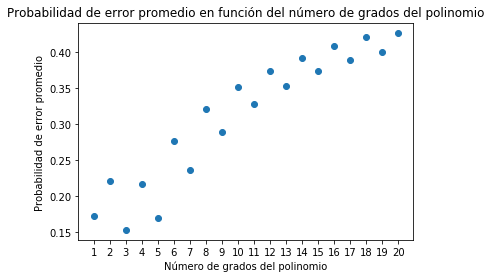

In [38]:
plt.plot(range(1,max_degree+1), scores, 'o')
plt.xticks(range(1,max_degree+1))
plt.xlabel('Número de grados del polinomio')
plt.ylabel('Probabilidad de error promedio ')
plt.title('Probabilidad de error promedio en función del número de grados del polinomio')
plt.show()

Ahora escoger nu

In [42]:
percentage_validation = 0.1
kf = KFold(n_splits=math.floor(1/percentage_validation))

nus = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
scores = []
best_score = 1
best_nu = -1

for nu in nus:

    i = 0
    score = 0
    print("Nu: %s" %nu)
    #Validación cruzada del SVM
    for train_index, test_index in kf.split(X_train):
        X_train_cv, X_validate = X_train[train_index], X_train[test_index]
        y_train_cv, y_validate = y_train[train_index], y_train[test_index] 
        nusvc = NuSVC(kernel = "poly", degree = 3,  gamma = "auto", nu = nu, max_iter = 1000000)
        nusvc.fit(X_train_cv,y_train_cv)
        fold_score = nusvc.score(X_validate, y_validate)
        score += fold_score
        i+=1
        print("    FOLD %s error: %s" % (i, 1 - fold_score))
    
    score = 1- (score/i)
    scores.append(score)
    
    if score < best_score:
        best_score = score
        best_nu = nu
    
    print("Average error probability for NuSVC with polynomial and a nu of %s: %s" % (nu, score))

print("Lowest error probability: %s for model with polynomial and a nu of %s" % (best_nu, best_degree))

Nu: 0.1
    FOLD 1 error: 0.14392803598200898
    FOLD 2 error: 0.19040479760119944
    FOLD 3 error: 0.18440779610194902
    FOLD 4 error: 0.1709145427286357
    FOLD 5 error: 0.19669669669669665
    FOLD 6 error: 0.18918918918918914
    FOLD 7 error: 0.20570570570570568
    FOLD 8 error: 0.19819819819819817
    FOLD 9 error: 0.1996996996996997
    FOLD 10 error: 0.17417417417417413
Average error probability for NuSVC with polynomial and a nu of 0.1: 0.18533188360774555
Nu: 0.2
    FOLD 1 error: 0.14542728635682156
    FOLD 2 error: 0.16641679160419787
    FOLD 3 error: 0.1709145427286357
    FOLD 4 error: 0.15442278860569714
    FOLD 5 error: 0.1501501501501501
    FOLD 6 error: 0.17717717717717718
    FOLD 7 error: 0.17567567567567566
    FOLD 8 error: 0.16516516516516522
    FOLD 9 error: 0.1921921921921922
    FOLD 10 error: 0.1576576576576577
Average error probability for NuSVC with polynomial and a nu of 0.2: 0.16551994273133697
Nu: 0.3
    FOLD 1 error: 0.13793103448275867
    

ValueError: specified nu is infeasible

//TODO, confianza del modelo final